# TACHE 8 : ph_bands

Dans ce notebook, nous allons calculer la vitesse du son pour trois branches acoustiques différentes du SrCN₂ dans trois directions différentes de la zone de Brillouin.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
mp_key = "hGFJONMWFhZMzX55ulNNTvmOkGE07nJS"
mp_id = "mp-12317"

In [3]:
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

##  Zone Brillouin :

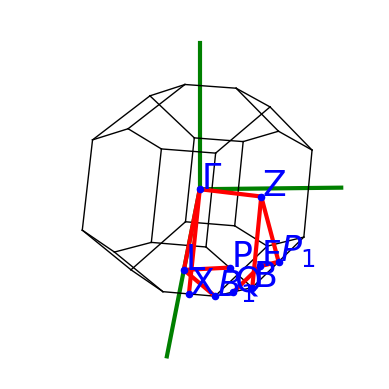

In [4]:
ph_bandstruc = PhononBSPlotter(ph_bs)
ph_bandstruc.plot_brillouin()

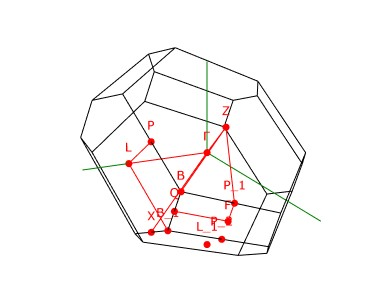

In [5]:
#plot_brillouin_zone(ph_bs.structure)
display(Image(filename="ph_Brilloin.jpg"))

## Structure de bande des phonons :

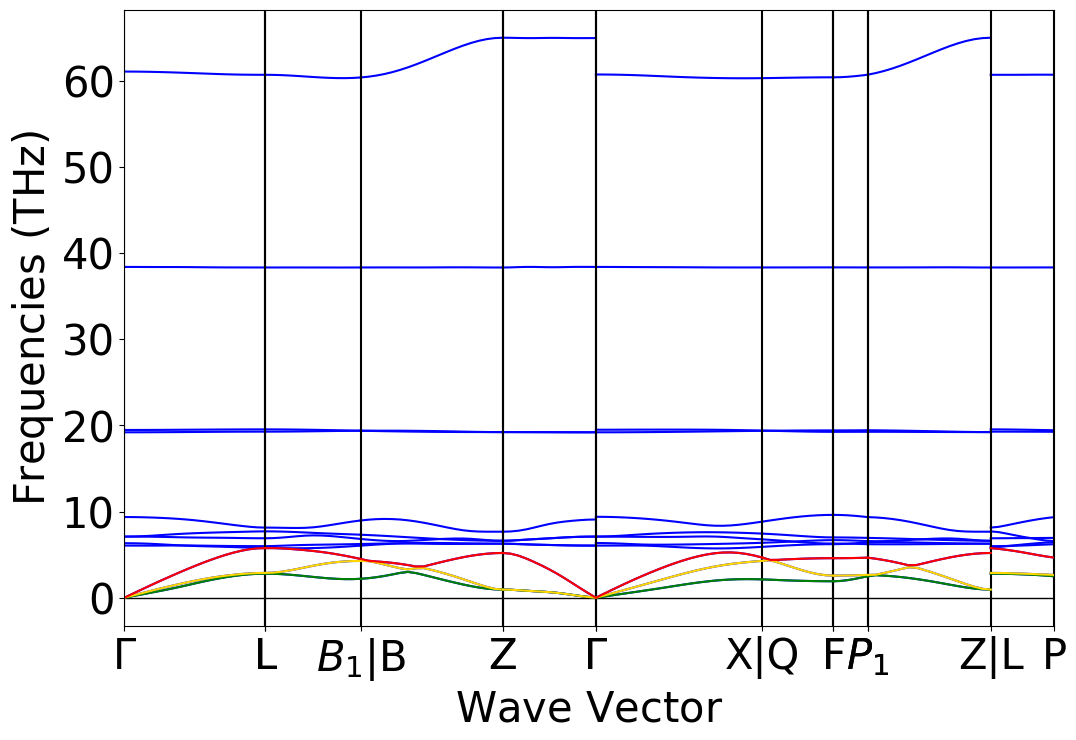

In [6]:
data_ph = ph_bandstruc.bs_plot_data()
distances = data_ph['distances']
frequences = data_ph['frequency']

ph_bandstruc_plot = ph_bandstruc.get_plot()

for i in range(len(distances)):
    plt.plot(distances[i], frequences[i][0], color = 'green')
    plt.plot(distances[i], frequences[i][1], color = 'gold')
    plt.plot(distances[i], frequences[i][2], color = 'red')

Les bandes acoustiques correspondent aux bandes pour lesquelles le phonon associé à une fréquence nulle 
dans la première zone de Brillouin.<br>
Grace à ce graphe, nous remarquons que les trois branches acoustiques que nous allons analyser correspondent aux directions : $\Gamma-L$ , $Z-\Gamma$ , $\Gamma-X|Q$


 

## Vitesses du son :

La vitesse du son est définie par la pente de la relation de dispersion : $$v_s = \frac{\partial \omega}{\partial q}$$ où $ \omega = 2 \pi f $ est la fréquence angulaire et $q$ le vecteur d'onde.<br>
Sous l'hypothèse d'une grande longueur d'onde, la relation est (pratiquement) linéaire.<br>

La vitesse du son d'une branche acoustique est donc calculée en penant la pente de la tangente à cette branche selon la direction choisie pour une fréquence nulle. 

### Calculs des vitesses

In [7]:
df1 = (frequences[0][0][1] - frequences[0][0][0]) #THz =  1e12 Hz = 1e12 1/s
dw1 = 2*np.pi*np.abs(df1)
dq1 = (distances[0][1]- distances[0][0]) #A^-1 = 1e10 m  

v_s1 = (dw1/dq1) * (1e12)*(1/1e10) #m/s
print('La vitesse du son de la première branche acoustique dans la direction Γ−𝐿 vaut : v_s =',v_s1, 'm/s')

La vitesse du son de la première branche acoustique dans la direction Γ−𝐿 vaut : v_s = 2085.918342430605 m/s


In [8]:
df2 = (frequences[3][1][-1] - frequences[3][1][-2]) #THz =  1e12 Hz = 1e12 1/s
dw2 = 2*np.pi*np.abs(df2)
dq2 = (distances[3][-1]- distances[3][-2]) #A^-1 = 1e10 m  

v_s2 = (dw2/dq2) * (1e12)*(1/1e10) #m/s
print('La vitesse du son de la deuxième branche acoustique dans la direction 𝑍−Γ vaut : v_s =',v_s2, 'm/s')

La vitesse du son de la deuxième branche acoustique dans la direction 𝑍−Γ vaut : v_s = 1105.9299117575326 m/s


In [9]:
df3 = (frequences[4][2][1] - frequences[4][2][0]) #THz =  1e12 Hz = 1e12 1/s
dw3 = 2*np.pi*np.abs(df3)
dq3 = (distances[4][1]- distances[4][0]) #A^-1 = 1e10 m  

v_s3 = (dw3/dq3) * (1e12)*(1/1e10) #m/s
print('La vitesse du son de la troisième branche acoustique dans la direction Γ−𝑋|𝑄 vaut : v_s =',v_s3, 'm/s')

La vitesse du son de la troisième branche acoustique dans la direction Γ−𝑋|𝑄 vaut : v_s = 5318.350069718365 m/s


### Représentation graphique

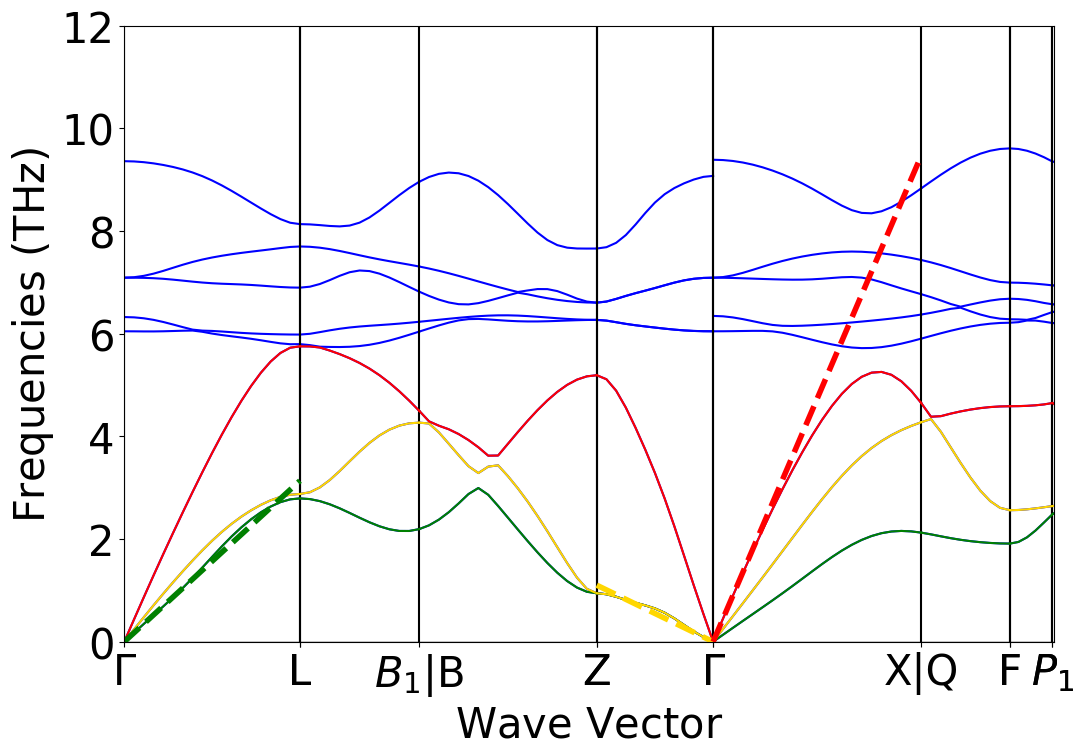

In [11]:
ph_bandstruc.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequences[i][0], color = 'green')
    plt.plot(distances[i], frequences[i][1], color = 'gold')
    plt.plot(distances[i], frequences[i][2], color = 'red')

plt.xlim(0, 5)
plt.ylim(0, 12)

# Tangente de la première bande dans la direction Γ−𝐿
approxi_lin_f1 = (df1/dq1)*(distances[0][-1]-distances[0][0])
plt.plot([distances[0][0], distances[0][-1]], [0,approxi_lin_f1], '--', color="green",lw=4)

# Tangente de la deuxième bande dans la direction 𝑍−Γ
approxi_lin_f2 = (df2/dq2)*(distances[3][0]-distances[3][-1])
plt.plot([distances[3][0], distances[3][-1]],[approxi_lin_f2,0], '--', color="gold",lw=4)

# Tangente de la troisième bande dans la direction Γ−𝑋|𝑄
approxi_lin_f3 = (df3/dq3)*(distances[4][-1]-distances[4][0])
plt.plot([distances[4][0], distances[4][-1]],[0,approxi_lin_f3], '--', color="red",lw=4)

plt.show()